## Topic: 08 - Classification Error Metric Challenges
## Date: 10/22/2018
## Name: Amine Naouas

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing

%matplotlib inline

**Challenge 1**

Reading and preparing the data

In [61]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
               names=['Class_Name',	'handicapped_infants','water_project_cost_sharing','adoption_of_the_budget_resolution','physician_fee_freeze','el_salvador_aid','religious_groups_in_schools','anti_satellite_test_ban','aid_to_nicaraguan_contras','mx_missile','immigration','synfuels_corporation_cutback','education_spending','superfund_right_to_sue','crime','duty_free_exports','export_administration_act_south_africa'],
               header=None)

df[df=='y']=1
df[df=='n']=0

for s in list(df.columns):
    if s != 'Class_Name':
        df[s]=pd.to_numeric(df[s], errors='coerce')

df=df.fillna(df.mean())

X=df.iloc[:,1:]
y=(df.iloc[:,0]=='democrat')*1

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [66]:
y_pred={}

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred['knn'] = knn.predict(X_test)

lr = LogisticRegression(C=1000000)
lr.fit(X_train, y_train)
y_pred['lr'] = lr.predict(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred['nb'] = nb.predict(X_test)

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred['dt'] = dt.predict(X_test)

rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred['rf'] = rf.predict(X_test)

In [71]:
res=np.empty([5, 4])
models=['knn','lr', 'nb','dt', 'rf']
for r in range(5):
    res[r,0]=accuracy_score(y_test, y_pred[models[r]])
    res[r,1]=precision_score(y_test,  y_pred[models[r]])
    res[r,2]=recall_score(y_test,  y_pred[models[r]])
    res[r,3]=f1_score(y_test,  y_pred[models[r]])

In [73]:
pd.DataFrame(res, columns=['accuracy', 'precision', 'recall', 'f1'],index=models)

,accuracy,precision,recall,f1
knn,0.900763,0.910256,0.922078,0.916129
lr,0.931298,0.925000,0.961039,0.942675
nb,0.938931,0.915663,0.987013,0.950000
dt,0.946565,0.948718,0.961039,0.954839
rf,0.961832,0.961538,0.974026,0.967742


**Challenge 2**

The logistic regression's AUC socre : 0.9805194805194805
The 3-nn model's AUC socre : 0.945887445887446
The naive Bayes model's AUC socre : 0.977032227032227
The decision tree model's AUC socre : 0.9434824434824436
The random forest model's AUC socre : 0.9908609908609909


<function matplotlib.pyplot.show(*args, **kw)>

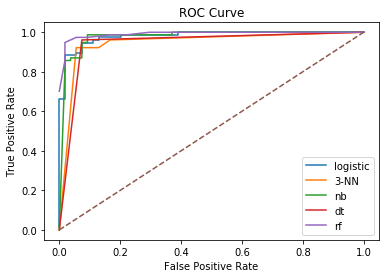

In [74]:
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
print("The logistic regression's AUC socre : " +str(auc(fpr, tpr)))

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
print("The 3-nn model's AUC socre : " +str(auc(fpr, tpr)))

fpr, tpr, _ = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
print("The naive Bayes model's AUC socre : " +str(auc(fpr, tpr)))
      
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
print("The decision tree model's AUC socre : " +str(auc(fpr, tpr)))
      
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
print("The random forest model's AUC socre : " +str(auc(fpr, tpr)))

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['logistic','3-NN', 'nb', 'dt', 'rf'])
plt.show

**Challenge 3**

In [75]:
res=np.empty([5, 4])

In [76]:
res[0,0]=np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='accuracy'))
res[0,1]=np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='precision'))
res[0,2]=np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='recall'))
res[0,3]=np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='f1'))

In [77]:
res[1,0]=np.mean(cross_val_score(lr,X_train,y_train, cv=5, scoring='accuracy'))
res[1,1]=np.mean(cross_val_score(lr,X_train,y_train, cv=5, scoring='precision'))
res[1,2]=np.mean(cross_val_score(lr,X_train,y_train, cv=5, scoring='recall'))
res[1,3]=np.mean(cross_val_score(lr,X_train,y_train, cv=5, scoring='f1'))

In [78]:
res[2,0]=np.mean(cross_val_score(nb,X_train,y_train, cv=5, scoring='accuracy'))
res[2,1]=np.mean(cross_val_score(nb,X_train,y_train, cv=5, scoring='precision'))
res[2,2]=np.mean(cross_val_score(nb,X_train,y_train, cv=5, scoring='recall'))
res[2,3]=np.mean(cross_val_score(nb,X_train,y_train, cv=5, scoring='f1'))

In [79]:
res[3,0]=np.mean(cross_val_score(dt,X_train,y_train, cv=5, scoring='accuracy'))
res[3,1]=np.mean(cross_val_score(dt,X_train,y_train, cv=5, scoring='precision'))
res[3,2]=np.mean(cross_val_score(dt,X_train,y_train, cv=5, scoring='recall'))
res[3,3]=np.mean(cross_val_score(dt,X_train,y_train, cv=5, scoring='f1'))

In [80]:
res[4,0]=np.mean(cross_val_score(rf,X_train,y_train, cv=5, scoring='accuracy'))
res[4,1]=np.mean(cross_val_score(rf,X_train,y_train, cv=5, scoring='precision'))
res[4,2]=np.mean(cross_val_score(rf,X_train,y_train, cv=5, scoring='recall'))
res[4,3]=np.mean(cross_val_score(rf,X_train,y_train, cv=5, scoring='f1'))

In [82]:
pd.DataFrame(res, columns=['accuracy', 'precision', 'recall', 'f1'],index=models)

,accuracy,precision,recall,f1
knn,0.937596,0.979217,0.921053,0.948022
lr,0.937650,0.967781,0.931579,0.948949
nb,0.921148,0.942504,0.931579,0.936517
dt,0.954044,0.967971,0.957895,0.962730
rf,0.957322,0.978220,0.942105,0.964962


**Challenge 4**

For this challenge, I will perform bianry models instead of multiclass for simplicity.

In [83]:
df2=pd.read_csv('2013_movies.csv',parse_dates=['ReleaseDate'], infer_datetime_format=True)
df2['Rating_bis']=(df2['Rating']=='PG-13')*1
df3=df2[~df2['Budget'].isna()]
X=df3.iloc[:,[1,2,5]]
y=df3['Rating_bis']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

In [85]:
lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_precision=precision_score(y_pred, y_test)
print( "Logistic regression's precision score is "+str(lr_precision))
lr_recall=precision_score(y_pred, y_test)
print( "Logistic regression's recall score is "+str(lr_recall))

Logistic regression's precision score is 0.8461538461538461
Logistic regression's recall score is 0.8461538461538461


In [86]:
dict={}
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    dict[k]=np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='accuracy'))
#     print(k,np.mean(cross_val_score(knn,X_train,y_train, cv=5, scoring='accuracy')))
(max(dict, key=dict.get),dict[max(dict, key=dict.get)])

(10, 0.6144522144522144)

10-nn has the best accuracy...

In [88]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
lr_precision=precision_score(y_pred, y_test)
print( "10-nn's precision score is "+str(lr_precision))
lr_recall=precision_score(y_pred, y_test)
print( "10-nn's recall score is "+str(lr_recall))

10-nn's precision score is 0.15384615384615385
10-nn's recall score is 0.15384615384615385


.. but bad precision ann recall scores

**Challenge 5**

In [89]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',
               names=['age', 'year', 'nodes', 'survival'],
               header=None)

In [90]:
X=df.iloc[:,0:-1]
y=(df.iloc[:,-1]==1)*1

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

In [94]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_tr=scaler.transform(X_train) 
X_te=scaler.transform(X_test) 
lr = LogisticRegression()
lr.fit(X_tr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The logistic regression's AUC socre : 0.7191142191142191


<function matplotlib.pyplot.show(*args, **kw)>

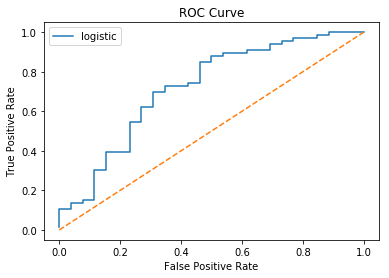

In [95]:
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
print("The logistic regression's AUC socre : " +str(auc(fpr, tpr)))


x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['logistic'])
plt.show